# <center><u>Numerical Solution to 1-D heat Equation</u>

We have the one dimensional heat equation $\dfrac{\partial U(x,t)}{\partial t} = \dfrac{\partial ^2 U}{\partial x^2}$ whith zero boundary conditions at x =0 and x=1 and an intial conditon $U(x,0) = u_0(x)$. To develop a simple psudeo analytical numerical solution, we can take a numerical fourier transform. <br>
using spearability we have
$$u(x,t) = f(x)g(t)$$
$$\text{hence } f(x)\dfrac{dg}{dt} = g(t) \dfrac{d^2f}{dx^2}$$
$$\dfrac{\dot{g}}{g} = \dfrac{\ddot{f}}{f}$$
By idependence of the variables:
$$\dfrac{dg}{dt} = -k^2 g(t)\; ;\dfrac{d^2f}{dx^2} = -k^2 f(x)$$<br>
Using boundary conditions we have $f(x) = sin(n\pi x)$ and $g(t) = e^{-n^2\pi^2t}$, Hence 
$$\boxed{U(x,t) = \sum_{n=0}^{\infty} A_n e^{-n^2\pi^2t}sin(n\pi x) \\ 
A_n = 2\int_{0}^{1}u_0(x)sin(n\pi x)dx}$$
And we find $A_n$ numerically with the given data.
### AN EXAMPLE
$u_0(x) = (1-x)^2sin(x)$ and we have a plot here

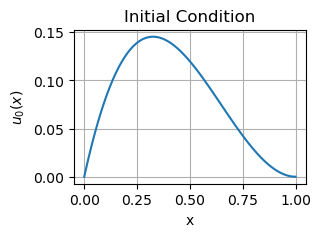

The boundary conditions are as explained in the assumption and using this model and finding coefficients upto n=10 we have 

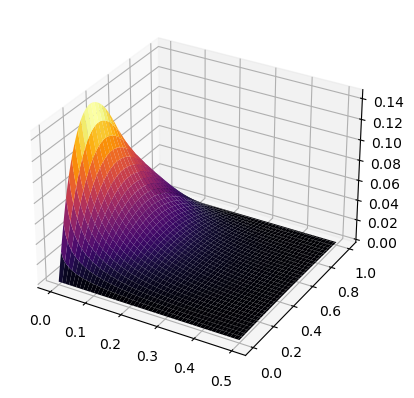

we plotted time from 0.o to o.5 seconds and the length from 0.0 to 1.0 seconds

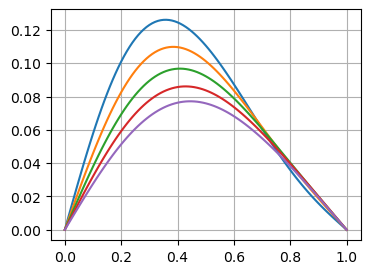

## Code

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [32]:
N=100
xs = np.linspace(0,1,N+1)

In [33]:
def u0(x):
    return np.sin(x)*(1-x)**2

In [34]:
def A(n,u):
    s=0
    for x in xs:
        s = s + 2*u(x)*np.sin(n*np.pi*x)/N
    return s
    

In [35]:
def heat(x,t):
    h =0
    for n in range(1,11):
        h =h + A(n,u0)*np.sin(n*np.pi*x)*np.e**(-(n*np.pi)*(n*np.pi)*t)
    return h
        

In [52]:
ts = np.linspace(0,0.5,100)

In [53]:
X,T=np.meshgrid(xs,ts)

In [54]:
H=heat(X,T)

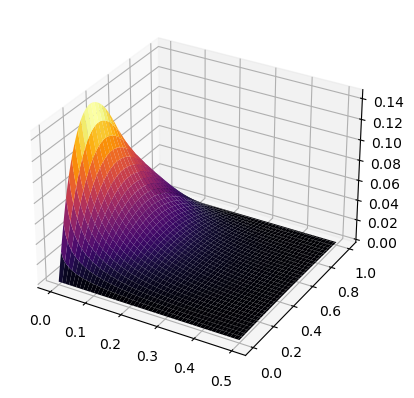

In [72]:

ax = plt.axes(projection='3d')
ax.plot_surface(T, X, H,cmap='inferno')
plt.show()


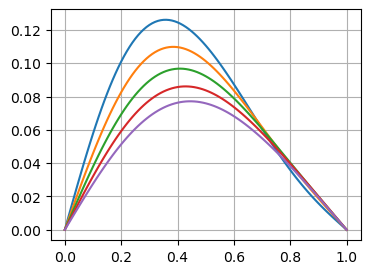

In [76]:
plt.figure(figsize=(4,3))
for t in range(1,6):
    plt.plot(xs,heat(xs,0.01*t))
plt.grid()